In [1]:
import pandas as pd
import covid.util as util
import covid.jhu as jhu
import covid.covidtracking as covidtracking

import covid.states as states

import matplotlib.pyplot as plt

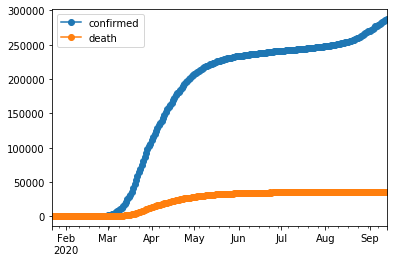

In [2]:
world = jhu.load_world()
world['Italy']['tot'].plot(style='-o')
plt.show()

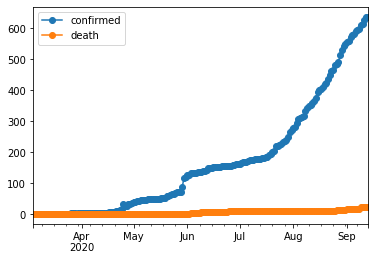

In [3]:
counties = jhu.load_us(counties=True)
start = '2020-03-04'
place = 'NC-Hertford'
counties[place][start:].plot(style='o-')
plt.show()

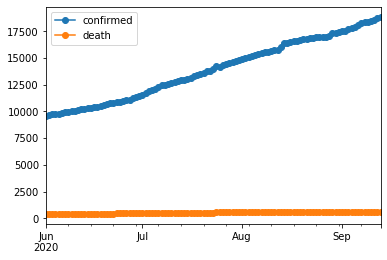

In [4]:
US = jhu.load_us()
start = '2020-06-01'
place = 'DE'
US[place][start:].plot(style='o-')
plt.show()

In [16]:
data = util.load_data()

# Visualize
data['PA']['data'].loc['2020-09-13', 'confirmed'] = 149567
print(data['PA']['data'].loc['2020-09-01':, 'confirmed'])
#data['PA']['data'].loc['2020-09-01':, 'confirmed'].plot(style='-o')
print(data['PA']['data'].loc['2020-09-01':, 'confirmed'].diff())



2020-09-01    139548
2020-09-02    140532
2020-09-03    141570
2020-09-04    142495
2020-09-05    143280
2020-09-06    143824
2020-09-07    144540
2020-09-08    145156
2020-09-09    146029
2020-09-10    146696
2020-09-11    147703
2020-09-12    148635
2020-09-13    149567
Name: confirmed, dtype: int64
2020-09-01       NaN
2020-09-02     984.0
2020-09-03    1038.0
2020-09-04     925.0
2020-09-05     785.0
2020-09-06     544.0
2020-09-07     716.0
2020-09-08     616.0
2020-09-09     873.0
2020-09-10     667.0
2020-09-11    1007.0
2020-09-12     932.0
2020-09-13     932.0
Name: confirmed, dtype: float64


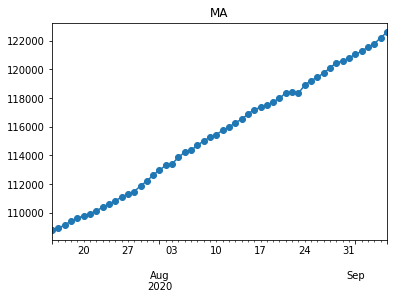

2020-06-15      NaN
2020-06-16    106.0
2020-06-17    177.0
2020-06-18    182.0
2020-06-19    139.0
              ...  
2020-09-02    204.0
2020-09-03    300.0
2020-09-04    212.0
2020-09-05    438.0
2020-09-06    366.0
Name: confirmed, Length: 84, dtype: float64


In [20]:
data = util.load_data()
start='2020-06-01'

# Visualize
#data['NJ']['data'].loc['2020-05-01':, 'death'].plot(style='-o')
#util.redistribute(data['IL']['data'], '2020-07-07', 225, 30)

util.redistribute(data['MA']['data'], '2020-09-03', -7936, 90, col='confirmed')
data['MA']['data'].loc['2020-07-15':, 'confirmed'].plot(style='-o')
plt.title('MA')
plt.show()

print(data['MA']['data'].loc['2020-06-15':, 'confirmed'].diff())


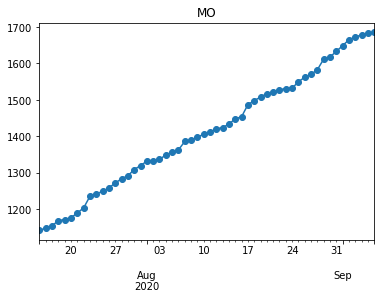

2020-08-15     NaN
2020-08-16     6.0
2020-08-17    33.0
2020-08-18    11.0
2020-08-19    10.0
2020-08-20     9.0
2020-08-21     4.0
2020-08-22     7.0
2020-08-23     3.0
2020-08-24     1.0
2020-08-25    18.0
2020-08-26    12.0
2020-08-27     8.0
2020-08-28    13.0
2020-08-29    29.0
2020-08-30     6.0
2020-08-31    15.0
2020-09-01    16.0
2020-09-02    16.0
2020-09-03     8.0
2020-09-04     5.0
2020-09-05     5.0
2020-09-06     2.0
Name: death, dtype: float64


In [31]:
data = util.load_data()

util.redistribute(data['MO']['data'], '2020-09-04', 16, 60)
util.redistribute(data['MO']['data'], '2020-09-05', 56, 60)
util.redistribute(data['MO']['data'], '2020-09-06', 15, 60)
data['MO']['data'].loc['2020-07-15':, 'death'].plot(style='-o')
plt.title('MO')
plt.show()

print(data['MO']['data'].loc['2020-08-15':, 'death'].diff())


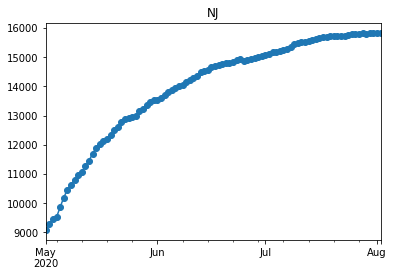

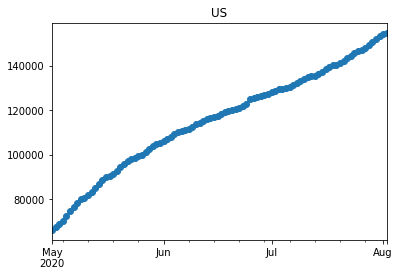

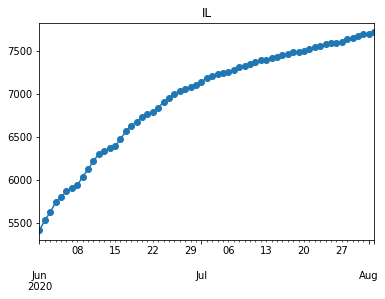

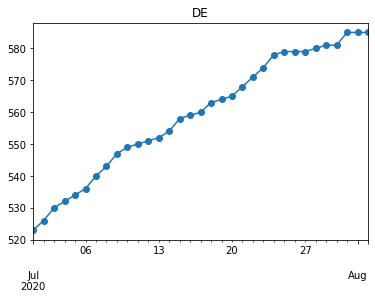

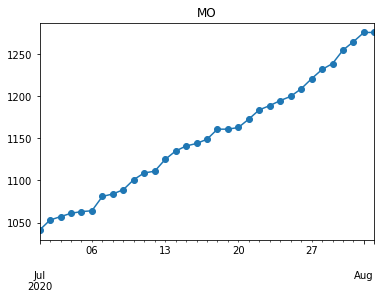

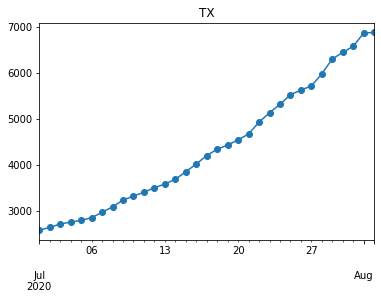

In [4]:
# Redistributing data

data = util.load_data()
start='2020-06-01'

#for place in ['NJ', 'US']:
#    util.redistribute(data[place]['data'], '2020-6-25', 1750, 60)

# Redistribute ~225 IL probable deaths added on 2020-07-07
util.redistribute(data['IL']['data'], '2020-07-07', 225, 30)
util.redistribute(data['DE']['data'], '2020-07-24', 45, 30)
util.redistribute(data['MO']['data'], '2020-07-23', 25, 30)
util.redistribute(data['TX']['data'], '2020-07-27', 550, 30)

# Visualize
data['NJ']['data'].loc['2020-05-01':, 'death'].plot(style='-o')
plt.title('NJ')
plt.show()

data['US']['data'].loc['2020-05-01':, 'death'].plot(style='-o')
plt.title('US')
plt.show()

data['IL']['data'].loc['2020-06-01':, 'death'].plot(style='-o')
plt.title('IL')
plt.show()

data['DE']['data'].loc['2020-07-01':, 'death'].plot(style='-o')
plt.title('DE')
plt.show()

data['MO']['data'].loc['2020-07-01':, 'death'].plot(style='-o')
plt.title('MO')
plt.show()

data['TX']['data'].loc['2020-07-01':, 'death'].plot(style='-o')
plt.title('TX')
plt.show()




In [ ]:
# Create list of county keys sorted by descending population
county_info = jhu.get_county_info().sort_values('Population', ascending=False)
pd.Series(county_info.index).to_csv('counties.txt', header=False, index=False)

In [ ]:
# County json file sorted by descending population
num_counties = 500
county_info = jhu.get_county_info().sort_values('Population', ascending=False)
json = county_info[['state', 'name', 'Population', 'Combined_Key']].iloc[:num_counties].to_json(orient='index')
with open(f'counties-{num_counties}.js', 'w') as f:
    f.write(f'var places={json};')

In [ ]:
# State json file
state_info = jhu.get_state_info().sort_index()
json = state_info[['name', 'Population', 'Combined_Key']].to_json(orient='index')
with open('states.js', 'w') as f:
    f.write(f'var places={json};')

In [ ]:
county_info = jhu.get_county_info()
county_info.loc['NY-New York City']
